In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import time
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,rc={"lines.linewidth": 2.5})
time_start = time.time()

In [2]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    #print("palette ", palette)

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []
    clusters = []
    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.mean(x[colors == i, :], axis=0)
        clusters.append([xtext,ytext])
        print("Avg Node Cluster Distance of Cluster ", i, " is ", np.mean(np.sqrt(np.sum((np.array(x[colors == i, :]) - np.mean(x[colors == i, :], axis=0))**2,axis = 1))))
        print("Cluster ",i," Center ",np.mean(x[colors == i, :], axis = 0))
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    n = list(range(len(clusters)))
    for i in range(len(clusters)):
        #print("Cluster Distance between ", i, " and others ")
        l = clusters.copy()
        l.pop(i)
        N = n.copy()
        N.pop(i)
        for j in range(len(l)):
            print(N[j]," ",np.sqrt(np.sum((np.array(clusters[i]) - np.array(l[j]))**2)))

    #return f, ax, sc, txts

In [3]:
n = list(range(5))
n

[0, 1, 2, 3, 4]

In [4]:
file = open("NET_DEBT_EBITDA_Data.csv", "r")
next(file)
NDE_Dict = {}
n = 0

for row in file:
    i,m,date,d = row.split(",")

    if i in NDE_Dict.keys():
        _,D = d.split(":")
        y,_,_ = date.split('-')
        y = int(y[1:])
        NDE_Dict[i].append((y,float(D[1:4])))
    else:
        _,D = d.split(":")
        D,_ = D.split(".")
        y,_,_ = date.split('-')
        y = int(y[1:])
        NDE_Dict[i] = [(y,float(D[1:4]))]
        

file.close()
n = 0
for i in NDE_Dict.items():
    print(i,"\n")
    n += 1
    if n == 10:
        break

('"00017f58-baec-51fd-9a90-e2acae968457"', [(1997, 0.0), (1996, 0.9), (1995, 1.2)]) 

('"0001e381-e787-576d-8183-56e0f5f4a895"', [(2007, 1.0), (2006, 0.1), (2005, 0.8)]) 

('"00023c5a-004b-53a9-b57f-fca73cca257f"', [(2005, 6.0), (2004, 7.4), (2003, 7.2), (2002, 7.4), (2001, 6.4), (2000, 5.5), (1999, 5.6), (1998, 3.3), (1997, 2.5), (1996, 2.6), (1995, 5.7)]) 

('"0004b29e-62ba-5f86-b3d5-4dcf0bd553b1"', [(2020, 4.0), (2019, 11.0), (2018, 31.0), (2017, 20.0), (2016, 2.0), (2015, 2.8), (2014, 5.5), (2013, 6.7), (2012, 11.0), (2011, -7.0), (2010, -2.0), (2009, -2.0), (2008, -0.0), (2007, 17.0), (2006, 1.8), (2005, 0.8), (2004, 1.1), (2003, 4.8), (2002, 4.6), (2001, 2.1), (2000, 2.0), (1999, 3.2), (1998, 2.6), (1997, 2.7)]) 

('"000a6285-b1d9-5767-9a9e-dc9b370fbb89"', [(2020, 2.0), (2019, 2.6), (2018, 3.3), (2017, 5.1), (2016, 3.1), (2015, 2.1), (2014, 1.1), (2013, 1.7), (2012, 1.3), (2011, 2.2), (2010, 1.7), (2009, 2.2), (2008, 1.7), (2007, 2.1), (2006, 2.4), (2005, 2.9), (2004, 1.7), (2003

In [5]:
print(len(NDE_Dict))

22733


In [6]:
def Get_Data(NDE_Dict):
    NDE_Year_Val_Dict = {}
    Year = []
    Data = []
    for i in NDE_Dict.items():
        ID,info = i
        year = []
        data = []
        for j in info:
            date,val = j
            year.append(date)
            data.append(val)

        Year.append(year)
        Data.append(data)


    ## Finding the Time Frame
    Data_Dict = {}
    n = 0
    X = []
    for i in range(len(Year)):
        if  all(x in Year[i] for x in list(range(2015,2020))):
            p = Year[i][0] - 2020
            q = p + 5
            if len(Data[i][p:q]) != 5:
                #print(Year[i])
                continue
            Data_Dict[n] = Data[i][p:q]
            X.append(Data[i][p:q])
            n += 1
    
    return X

X = Get_Data(NDE_Dict)
print(len(X))

# def Last_N_Year_Data(x):
#     X_N = []
    
#     for i in X:
#         X_N.append(i[-5:])
        
#     return X_N

# X_5 = Last_N_Year_Data(X)

3454


In [7]:
# for i in X:
#     print()
print(X[0])

[4.0, 11.0, 31.0, 20.0, 2.0]


Avg Node Cluster Distance of Cluster  0  is  42.26358
Cluster  0  Center  [-0.59718204  0.44617477]
Avg Node Cluster Distance of Cluster  1  is  0.70999855
Cluster  1  Center  [-19.940496 -66.7447  ]
Avg Node Cluster Distance of Cluster  2  is  0.29227072
Cluster  2  Center  [-10.055206 -28.059566]
Avg Node Cluster Distance of Cluster  3  is  0.3841005
Cluster  3  Center  [-25.777136 -54.1787  ]
Avg Node Cluster Distance of Cluster  4  is  0.0055732066
Cluster  4  Center  [-11.790325 -19.230734]
1   69.91979
2   30.033838
3   60.14904
4   22.637737
0   69.91979
2   39.928165
3   13.855349
4   48.207905
0   30.033838
1   39.928165
3   30.485868
4   8.997718
0   60.14904
1   13.855349
2   30.485868
4   37.642944
0   22.637737
1   48.207905
2   8.997718
3   37.642944


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


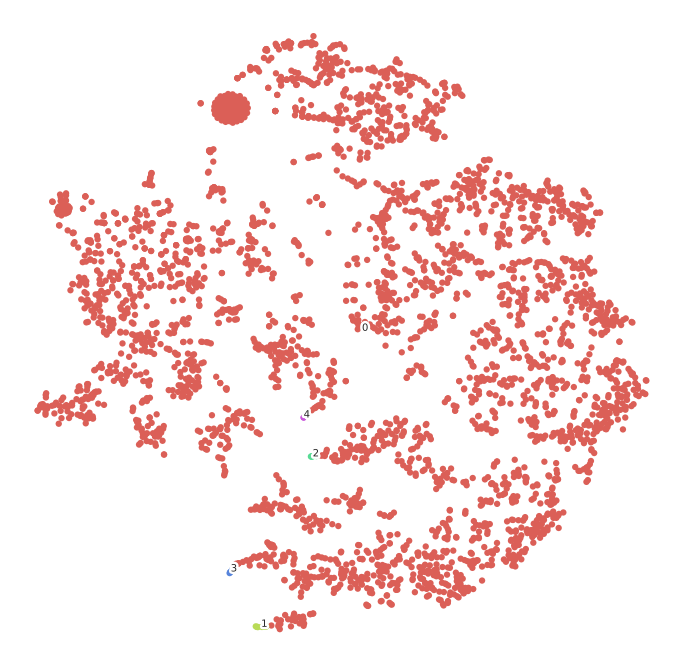

In [8]:
kmeans_before = KMeans(n_clusters=5, random_state=0).fit(np.array(X))

# cluster = np.where(kmeans_before.labels_ == 2)[0]
# print(len(cluster))
# for i in cluster:
#     print(X[i])
#     #Y1,Y2 = Embedding(X[i],X[i])
#     #print(Y1,"\n")

fashion_tsne = TSNE(random_state=123).fit_transform(X)
fashion_scatter(fashion_tsne, kmeans_before.labels_)

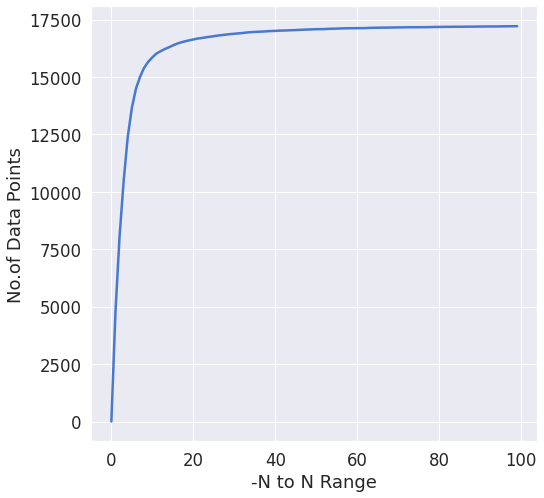

In [9]:
def R_Threshold(X):
    
    x_axis = []
    y_axis = []
    for n in range(100):
        count = 0
        for i in X:
            for j in i:
                if j >= 0 and j < n:
                    count += 1
                if j < 0 and j > -n:
                    count += 1
        
        x_axis.append(n)
        y_axis.append(count)
        
    
    plt.figure(figsize = (8,8))
    plt.xlabel("-N to N Range")
    plt.ylabel("No.of Data Points")
    plt.plot(x_axis,y_axis)
    plt.show()
    
#     for j in range(len(x_axis)):
#         print(x_axis[j],", ",y_axis[j]/(len(X)*len(X[0])))
        
    r_threshold = 0
    for i in range(len(x_axis)):
        if y_axis[i]/(len(X)*len(X[0])) > 0.99:
            r_threshold = x_axis[i]
            
    
    for i in range(len(X)):
        for j in range(len(X[0])):
            if X[i][j] > r_threshold:
                X[i][j] = r_threshold
            elif X[i][j] < -r_threshold:
                X[i][j] = -r_threshold
                
    return X, np.around(np.array(X)/r_threshold,4), r_threshold
    
    
X_Cap, X_Normalised, R_threshold = R_Threshold(X)
                
            

In [10]:
# Normalised Raw Data

# kmeans_Embedding = KMeans(n_clusters=5, random_state=0).fit((X_Normalised))
# fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding)
# fashion_scatter(fashion_tsne, kmeans_Embedding.labels_)

In [11]:
#cluster = np.where(kmeans_after.labels_ == 2)[0]
#print(len(cluster))

# for i in cluster:
# #     print(Transformed_Dict[str(T_X[i])])
# #     print(T_X[i],\"\\n\")
#     #Y1,Y2 = Embedding(X[i],X[i])
#     #print(Y1,\"\\n\")
#     plt.plot(range(14),Transformed_Dict[str(T_X[i])])

# plt.show()

In [12]:
# Data = []
# for i in T_X:
#     Data.append(Transformed_Dict[str(i)])

# fashion_tsne = TSNE(random_state=123).fit_transform(T_X)
# fashion_scatter(fashion_tsne, kmeans_after.labels_)


Avg Node Cluster Distance of Cluster  0  is  47.642384
Cluster  0  Center  [-17.64895  -11.598373]
Avg Node Cluster Distance of Cluster  1  is  32.52316
Cluster  1  Center  [ 0.48922122 -3.0824642 ]
Avg Node Cluster Distance of Cluster  2  is  56.82691
Cluster  2  Center  [-17.016834     0.69921726]
Avg Node Cluster Distance of Cluster  3  is  41.9303
Cluster  3  Center  [-21.050991  12.465674]
Avg Node Cluster Distance of Cluster  4  is  24.46095
Cluster  4  Center  [60.924927 19.907404]
1   20.037813
2   12.313826
3   24.303339
4   84.65499
0   20.037813
2   17.90986
3   26.565493
4   64.66072
0   12.313826
1   17.90986
3   12.4388075
4   80.273735
0   24.303339
1   26.565493
2   12.4388075
4   82.313
0   84.65499
1   64.66072
2   80.273735
3   82.313


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


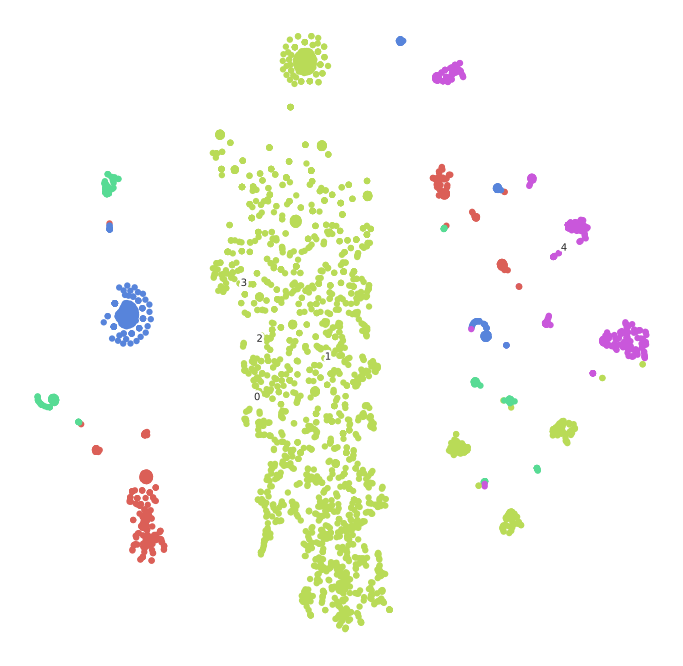

In [13]:
def Embedding1(X):          # Separating +ve's and -ve's with    1 and -1  
    
    embeddings = []
    for i in X:
        l = []
        for j in i:
            if j >= 0:
                #l.append(1)
                l.append(j)
            elif j < 0:
                #l.append(-1)
                l.append(-1)
                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return embeddings

X_Embedding1 = Embedding1(X_Normalised)

kmeans_Embedding1 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding1))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding1)
fashion_scatter(fashion_tsne, kmeans_Embedding1.labels_)

Avg Node Cluster Distance of Cluster  0  is  16.27783
Cluster  0  Center  [41.485752 32.964703]
Avg Node Cluster Distance of Cluster  1  is  29.947989
Cluster  1  Center  [-18.150063   -4.6230135]
Avg Node Cluster Distance of Cluster  2  is  18.476704
Cluster  2  Center  [44.503445  -6.8483243]
Avg Node Cluster Distance of Cluster  3  is  37.09459
Cluster  3  Center  [25.961374 21.48245 ]
Avg Node Cluster Distance of Cluster  4  is  22.360037
Cluster  4  Center  [ 27.103159 -43.86434 ]
1   70.49303
2   39.927227
3   19.309282
4   78.16368
0   70.49303
2   62.693012
3   51.25733
4   59.897713
0   39.927227
1   62.693012
3   33.85914
4   40.90178
0   19.309282
1   51.25733
2   33.85914
4   65.356766
0   78.16368
1   59.897713
2   40.90178
3   65.356766


/root/.cache/pypoetry/virtualenvs/oaknorth-ml-lib-QXhsOmlJ-py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


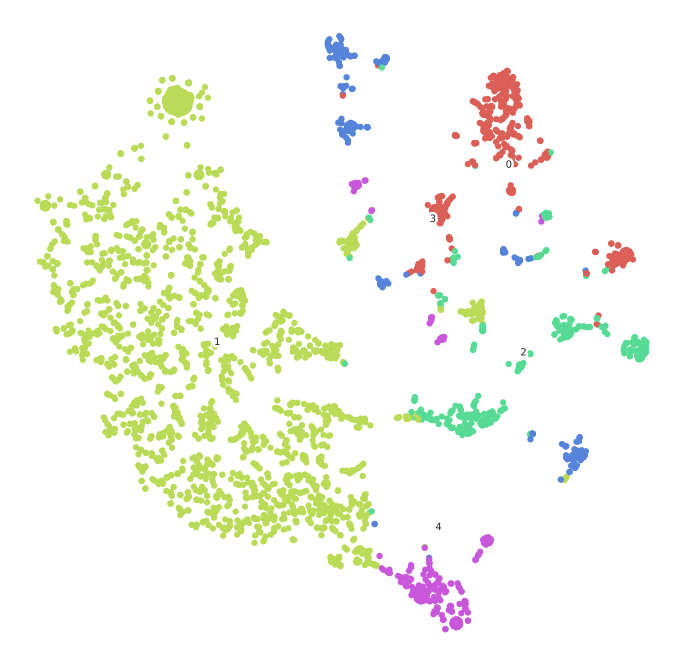

In [14]:
def Embedding2(X,R_threshold):            #  Transformed and Normalised Data
    
    embeddings = []
    for i in X:

        l = [0]
        for j in range(len(i)):
            if i[j] >= 0:
                if j > 0 and j < len(i) -1:
                    l.append((abs(i[j]) - abs(i[j+1]))/R_threshold)
                elif j == len(i)-1:
                    l.append(0)
                #l.append(1)
                l.append(i[j]/R_threshold)
                
            elif i[j] < 0:
                if j > 0 and j < len(i) - 1:
                    l.append((abs(i[j]) - abs(i[j+1]))/R_threshold)
                elif j == len(i)-1:
                    l.append(0)
                #l.append(-1)
                l.append(1 - abs(i[j])/R_threshold)
                
        l = np.array(l)
        l = l.round(decimals=2)
        embeddings.append(l)
        
    return embeddings

X_Embedding2 = Embedding2(X_Cap,R_threshold)

kmeans_Embedding2 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding2))
fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding2)
fashion_scatter(fashion_tsne, kmeans_Embedding2.labels_)

In [15]:
def Transform2(X,R_threshold):
    transform_vectors = []
    Dict = {}
    for i in X:
        new_vec = []
        
        i = [x or 0.1 for x in i]
        
        for j in range(1,len(i)):
            
            if (i[j-1] > 0) & (i[j] > 0):
                if i[j-1] > i[j]:
                    new_vec.append((i[j-1] - i[j])/i[j])
                elif i[j-1] < i[j]:
                    new_vec.append(-(i[j-1] - i[j])/i[j])
                else:
                    new_vec.append(1/i[j])
                
            elif (i[j-1] < 0) & (i[j] < 0):
                if i[j-1] > i[j]:
                    new_vec.append((i[j-1] - i[j])/i[j])
                elif i[j-1] < i[j]:
                    new_vec.append((i[j-1] - i[j])/abs(i[j]))
                else:
                    new_vec.append(1/i[j])
                
            elif (i[j-1] > 0) & (i[j] < 0):
                new_vec.append((i[j-1] - i[j])/(i[j]))
            
            elif (i[j-1] < 0) & (i[j] > 0):
                new_vec.append((i[j] - i[j-1])/i[j])
                
                
        new_vec = np.array(new_vec)
        new_vec = new_vec.round(decimals=2)
        Dict[str(new_vec)] = i
        transform_vectors.append(new_vec)
        
        
    return Dict, transform_vectors

In [16]:
# Transformed_Dict, T_X = Transform2(X_Cap,R_threshold)

# # print(X[0])
# # for i in T_X:
# #     print(i)
# #     break

# kmeans_after = KMeans(n_clusters=5, random_state=0).fit(np.array(T_X))
# fashion_tsne = TSNE(random_state=123).fit_transform(T_X)
# fashion_scatter(fashion_tsne, kmeans_after.labels_)

In [17]:
# def Embedding3(X):           # Raw Data 1/X
    
#     embeddings = []
#     for i in X:
#         l = []
#         i = [x or 0.1 for x in i]
#         for j in i:
#             l.append(1/j)
                
#         l = np.array(l)
#         l = l.round(decimals=2)
#         embeddings.append(l)
        
#     return embeddings

# X_Embedding3 = Embedding3(X_Cap)

# kmeans_Embedding3 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding3))
# fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding3)
# fashion_scatter(fashion_tsne, kmeans_Embedding3.labels_)

In [18]:
# def Embedding4(X):          
    
#     embeddings = []
#     for i in X:
#         l = []
#         i = [x or 0.1 for x in i]
#         for j in i:
#             if j >= 1:
#                 l.append(1)
#             elif j < 0:
#                 l.append(1)
#             elif j < 1 and j >= 0:
#                 l.append(j)
                
#         l = np.array(l)
#         l = l.round(decimals=2)
#         embeddings.append(l)
        
#     return  embeddings#Embedding2(embeddings,1)

# X_Embedding4 = Embedding4(X_Cap)

# kmeans_Embedding4 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding4))
# fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding4)
# fashion_scatter(fashion_tsne, kmeans_Embedding4.labels_)

In [19]:
# cluster = np.where(kmeans_Embedding4.labels_ == 4)[0]
# print(len(cluster))

# for i in cluster:
#     print(X_Embedding4[i])


In [20]:

# def Embedding5(X,R_threshold):         
    
#     embeddings = []
#     for i in X:

#         l = [0]
#         for j in range(len(i)):
#             if j > 0 and j < len(i) -1:
#                 l.append((abs(i[j]) - abs(i[j+1]))/R_threshold)
#             elif j == len(i)-1:
#                 l.append(0)
#             l.append(i[j]/R_threshold)

                
#         l = np.array(l)
#         l = l.round(decimals=2)
#         embeddings.append(l)
        
#     return embeddings

# X_Embedding5 = Embedding5(X_Embedding4,1)

# kmeans_Embedding5 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding5))
# fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding5)
# fashion_scatter(fashion_tsne, kmeans_Embedding5.labels_)

In [21]:
# cluster = np.where(kmeans_Embedding5.labels_ == 3)[0]
# print(len(cluster))

# for i in cluster:
#     print(X_Embedding5[i])


In [22]:
# X_Embedding_last5 = Embedding4(X_Embedding5)

# kmeans_Embedding_last5 = KMeans(n_clusters=5, random_state=0).fit(np.array(X_Embedding_last5))
# fashion_tsne = TSNE(random_state=123).fit_transform(X_Embedding_last5)
# fashion_scatter(fashion_tsne, kmeans_Embedding_last5.labels_)

In [23]:
# cluster = np.where(kmeans_Embedding_last5.labels_ == 4)[0]
# print(len(cluster))

# for i in cluster:
#     print(X_Embedding_last5[i])